Download the dataset from Kaggle using the custiom downloader library that can be obtained from the libraries repository.

In [2]:
import sys
sys.path.append(r"C:\Users\Utkarsh\Python\libraries")

import importlib
import dataset_downloader
importlib.reload(dataset_downloader)

from dataset_downloader import download_kaggle_dataset as downloader

downloader("electricity_load_forecasting")

Loading the data into a dataframe.

In [ ]:
import pandas as pd

# CSV files
continuous_df = pd.read_csv("datasets/continuous dataset.csv", parse_dates=True)
weekly_df = pd.read_csv("datasets/weekly pre-dispatch forecast.csv", parse_dates=True)

# Excel files
train_df = pd.read_excel("datasets/train_dataframes.xlsx", sheet_name=None)  # loads all sheets
test_df = pd.read_excel("datasets/test_dataframes.xlsx", sheet_name=None)


Train sheets: ['Week 15, Apr 2019', 'Week 21, May 2019', 'Week 24, Jun 2019', 'Week 29, Jul 2019', 'Week 33, Aug 2019', 'Week 37, Sep 2019', 'Week 41, Oct 2019', 'Week 44, Nov 2019', 'Week 51, Dec 2019', 'Week 01, Jan 2020', 'Week 06, Feb 2020', 'Week 10, Mar 2020', 'Week 20, May 2020', 'Week 24, Jun 2020']
Test sheets: ['Week 15, Apr 2019', 'Week 21, May 2019', 'Week 24, Jun 2019', 'Week 29, Jul 2019', 'Week 33, Aug 2019', 'Week 37, Sep 2019', 'Week 41, Oct 2019', 'Week 44, Nov 2019', 'Week 51, Dec 2019', 'Week 01, Jan 2020', 'Week 06, Feb 2020', 'Week 10, Mar 2020', 'Week 20, May 2020', 'Week 24, Jun 2020']
Continuous dataset:
              datetime  nat_demand    T2M_toc  QV2M_toc   TQL_toc    W2M_toc  \
0  2015-01-03 01:00:00    970.3450  25.865259  0.018576  0.016174  21.850546   
1  2015-01-03 02:00:00    912.1755  25.899255  0.018653  0.016418  22.166944   
2  2015-01-03 03:00:00    900.2688  25.937280  0.018768  0.015480  22.454911   
3  2015-01-03 04:00:00    889.9538  25.9575

Peeking at the data to understand its structure and types.

In [8]:
# Convert datetime column
continuous_df['datetime'] = pd.to_datetime(continuous_df['datetime'])
weekly_df['datetime'] = pd.to_datetime(weekly_df['datetime'])

# Set datetime as index (optional for time-series)
continuous_df.set_index('datetime', inplace=True)
weekly_df.set_index('datetime', inplace=True)

# Print sheet names for Excel files
print("Train sheets:", list(train_df.keys()))
print("Test sheets:", list(test_df.keys()))

# Peek at the data
print("Continuous dataset:")
print(continuous_df.head(25), continuous_df.dtypes)

print("Weekly pre-dispatch forecast:")
print(weekly_df.head(25), weekly_df.dtypes)

Train sheets: ['Week 15, Apr 2019', 'Week 21, May 2019', 'Week 24, Jun 2019', 'Week 29, Jul 2019', 'Week 33, Aug 2019', 'Week 37, Sep 2019', 'Week 41, Oct 2019', 'Week 44, Nov 2019', 'Week 51, Dec 2019', 'Week 01, Jan 2020', 'Week 06, Feb 2020', 'Week 10, Mar 2020', 'Week 20, May 2020', 'Week 24, Jun 2020']
Test sheets: ['Week 15, Apr 2019', 'Week 21, May 2019', 'Week 24, Jun 2019', 'Week 29, Jul 2019', 'Week 33, Aug 2019', 'Week 37, Sep 2019', 'Week 41, Oct 2019', 'Week 44, Nov 2019', 'Week 51, Dec 2019', 'Week 01, Jan 2020', 'Week 06, Feb 2020', 'Week 10, Mar 2020', 'Week 20, May 2020', 'Week 24, Jun 2020']
Continuous dataset:
                     nat_demand    T2M_toc  QV2M_toc       TQL_toc    W2M_toc  \
datetime                                                                        
2015-01-03 01:00:00    970.3450  25.865259  0.018576  1.617432e-02  21.850546   
2015-01-03 02:00:00    912.1755  25.899255  0.018653  1.641846e-02  22.166944   
2015-01-03 03:00:00    900.2688  25.937

Initial exploration of the data


In [10]:
# Missing values?
print("Missing values per column:")
print(continuous_df.isnull().sum())

# Summary statistics
print("\nSummary stats:")
print(continuous_df.describe())




Missing values per column:
nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

Summary stats:
         nat_demand       T2M_toc      QV2M_toc       TQL_toc       W2M_toc  \
count  48048.000000  48048.000000  48048.000000  48048.000000  48048.000000   
mean    1182.868647     27.399111      0.018313      0.079979     13.391049   
std      192.068896      1.675462      0.001607      0.065589      7.295502   
min       85.192500     22.953455      0.012054      0.000000      0.008979   
25%     1020.056900     26.160455      0.017236      0.026451      7.544958   
50%     1168.427700     27.118051      0.018590      0.065201     12.182103   
75%     1327.563950     28.558344      0.019521      0.117310     18.661282   
max     1754.882000     35.039575      0.022690      0.5

<Axes: title={'center': 'National Demand Distribution'}, ylabel='Frequency'>

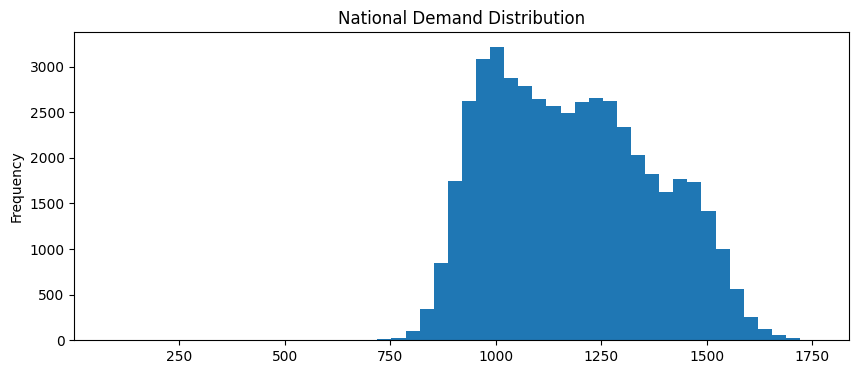

In [12]:
# Demand distribution
continuous_df['nat_demand'].plot(kind='hist', bins=50, figsize=(10, 4), title="National Demand Distribution")

<Axes: title={'center': 'Hourly Demand Over Time'}, xlabel='datetime', ylabel='Frequency'>

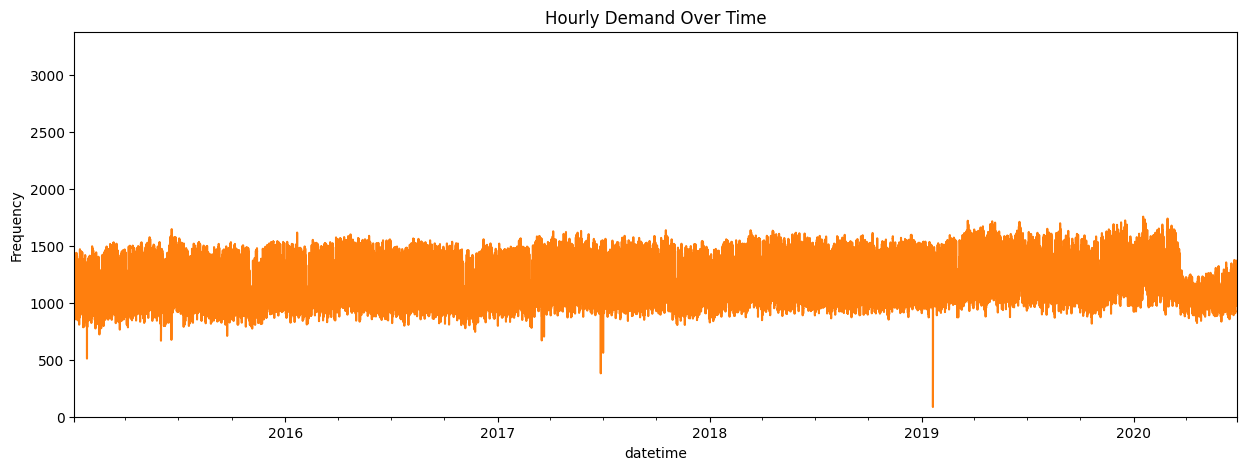

In [ ]:
# Demand over time
continuous_df['nat_demand'].plot(figsize=(15, 5), title="Hourly Demand Over Time")

Adding time based features to the dataframe.

<Axes: title={'center': 'Avg Demand by Hour'}, xlabel='hour'>

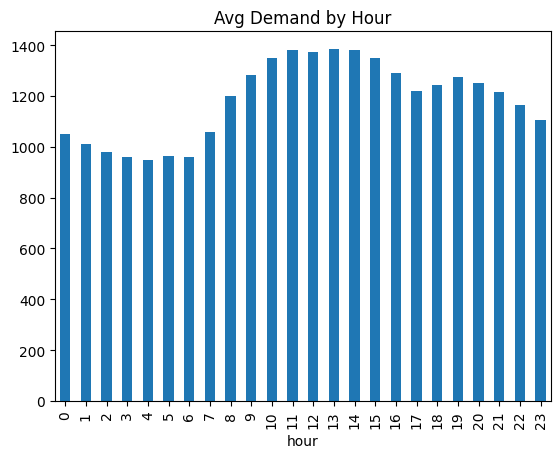

In [13]:
continuous_df['hour'] = continuous_df.index.hour
continuous_df['dayofweek'] = continuous_df.index.dayofweek
continuous_df['month'] = continuous_df.index.month
continuous_df['year'] = continuous_df.index.year

# Plot average demand by hour
continuous_df.groupby('hour')['nat_demand'].mean().plot(kind='bar', title="Avg Demand by Hour")
